In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
daily_ret = pd.read_csv('return_daily.csv', index_col='Unnamed: 0')
# daily_ret = daily_ret.rename(columns={'Unnamed: 0': 'ISIN CODE'})
daily_ret

,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-18,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
DE0005190003,0.009048,0.014069,0.009148,-0.011331,-0.014364,-0.034109,0.012520,0.009195,-0.006912,0.011705,...,0.000974,-0.011877,-0.004532,-0.011580,-0.005407,0.010369,NaN,NaN,0.003789,0.001391
DE0007100000,-0.005603,-0.003329,-0.009155,0.000259,0.008556,-0.031749,0.008330,0.019979,-0.012972,0.006571,...,0.017350,-0.012093,-0.009887,-0.010303,0.001602,0.007675,NaN,NaN,-0.011136,0.007079
DE0007664005,0.015633,0.001348,0.008022,0.014982,-0.010064,-0.024413,0.007301,-0.012360,-0.008695,-0.002749,...,-0.015091,-0.006855,-0.001218,0.003659,-0.024706,-0.000831,NaN,NaN,-0.015520,-0.000426
US88262P1021,0.056468,-0.025180,-0.008330,-0.025210,-0.002762,-0.005882,0.015308,-0.040771,-0.004639,NaN,...,-0.004190,0.003218,0.015602,-0.008406,0.002683,-0.001372,0.014055,-0.000903,-0.023769,-0.016063
DE0005439004,0.068941,0.006240,0.138334,0.022166,-0.063386,-0.043002,0.043728,-0.018061,-0.019836,0.026566,...,0.010582,-0.008377,-0.000528,0.004754,-0.002366,0.005534,NaN,NaN,0.008179,0.007590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA98474P5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.024096,0.012346,0.012195,0.024096,0.000000,0.000000,NaN,NaN,0.023256,-0.011364
JP3955800002,-0.010000,0.008418,-0.050083,-0.010545,-0.001776,0.017794,-0.005245,-0.001757,0.007042,-0.031469,...,-0.009804,0.000000,-0.019802,0.030303,-0.009804,0.009901,NaN,NaN,0.000000,0.009804
CA98936C8584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
GB00BF44KY60,-0.024390,-0.025000,0.000000,0.000000,0.076923,0.214286,0.254902,-0.234375,0.000000,-0.081633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000


In [3]:
market_ret = daily_ret[daily_ret.index == 'mean']
# market_ret = market_ret.reset_index()
# market_ret = market_ret.drop(columns='index')
# market_ret = market_ret.to_numpy()
market_ret
# print((market_ret))

,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-18,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
mean,0.036674,-0.00724,0.067905,-0.009042,0.039345,0.025866,-0.070765,0.021773,-0.002867,0.044787,...,0.005457,-0.00013,0.002568,0.000428,-0.003369,0.003074,3.273909,-0.763625,-0.009605,-0.001829


In [4]:
market_ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, mean to mean
Columns: 3613 entries, 2010-01-05 to 2023-12-29
dtypes: float64(3613)
memory usage: 28.2+ KB


In [5]:
asset_i_ret = daily_ret.drop('mean', axis=0)
asset_i_ret = asset_i_ret.reset_index()
asset_i_ret = asset_i_ret.drop(columns='index')
asset_i_ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Columns: 3613 entries, 2010-01-05 to 2023-12-29
dtypes: float64(3613)
memory usage: 6.0 MB


In [6]:
start_date = '2010-01-04'
end_date = '2015-01-04'
event_start = '2015-09-18'
event_window = 20

In [7]:
def estimate_market_model(asset_returns, market_returns):
    """
    This function estimates alpha and beta using OLS regression.
    asset_returns: Series of asset returns (dependent variable)
    market_returns: Series of market returns (independent variable)
    """
    # Drop NaN values from both asset and market returns
    combined_data = pd.concat([asset_returns, market_returns], axis=1).dropna()
    
    if len(combined_data) < 20:  # Ensure there are enough data points for regression
        return pd.Series([None, None], index=['alpha', 'beta'])
    
    asset_returns_cleaned = combined_data.iloc[:, 0]
    market_returns_cleaned = combined_data.iloc[:, 1]

    X = sm.add_constant(market_returns_cleaned)  # Add a constant for alpha
    model = sm.OLS(asset_returns_cleaned, X)
    results = model.fit()
    
    return results.params  # Returns [alpha, beta]

In [8]:
mret_estimation_period = market_ret.loc[:, start_date:end_date]
asset_ret_estimation_period = asset_i_ret.loc[:, start_date:end_date]

In [9]:
alphas = {}
betas = {}

for asset in asset_ret_estimation_period.index:
    asset_returns = asset_ret_estimation_period.loc[asset]
    params = estimate_market_model(asset_returns, mret_estimation_period.iloc[0])
    alphas[asset] = params[0]
    betas[asset] = params[1]

C:\Users\veren\AppData\Local\Temp\ipykernel_15684\3060432562.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas[asset] = params[0]
C:\Users\veren\AppData\Local\Temp\ipykernel_15684\3060432562.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[asset] = params[1]
C:\Users\veren\AppData\Local\Temp\ipykernel_15684\3060432562.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas[asset] = params[0]
C:\Users\veren\AppDa

In [10]:
# betas

In [11]:
event_start_idx = market_ret.columns.get_loc(event_start)
event_end_idx = event_start_idx + event_window * 2

In [12]:
mret_event_period = market_ret.iloc[:, event_start_idx - event_window: event_end_idx + event_window]
asset_ret_event_period = asset_i_ret.loc[:, mret_event_period.columns]

In [13]:
# calc abnormal returns
abnormal_returns = pd.DataFrame(index=asset_ret_event_period.index, columns=mret_event_period.columns)

In [14]:
for asset in asset_ret_event_period.index:
    # Check if alpha and beta are valid (not None)
    if alphas.get(asset) is not None and betas.get(asset) is not None:
        actual_returns = asset_ret_event_period.loc[asset]
        predicted_returns = alphas[asset] + betas[asset] * mret_event_period.iloc[0]
        abnormal_returns.loc[asset] = actual_returns - predicted_returns
    else:
        # Handle missing alpha or beta (skip or set NaN for abnormal returns)
        abnormal_returns.loc[asset] = None  # Or skip this asset


In [15]:
# calc CAR

cumulative_abnormal_returns = abnormal_returns.cumsum(axis=1)
cumulative_abnormal_returns

,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,...,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10
0,-0.018102,-0.034013,-0.008438,-0.00333,0.022695,0.015784,0.0074,-0.025617,-0.021567,-0.000836,...,0.156886,0.174922,0.167867,0.16674,0.117444,0.133004,0.14256,0.115978,0.104044,0.112635
1,-0.023541,-0.043241,-0.020067,-0.015762,0.017239,0.004393,-0.0045,-0.03327,-0.026688,0.001022,...,0.100946,0.12643,0.111147,0.100275,0.041994,0.062868,0.066805,0.041803,0.025728,0.036757
2,-0.015986,-0.036304,-0.006051,-0.003108,0.025755,0.012866,-0.007239,-0.042239,-0.05255,-0.027274,...,-0.223959,-0.173031,-0.204315,-0.208601,-0.206931,-0.190419,-0.212605,-0.23731,-0.189338,-0.186672
3,0.001241,-0.036803,-0.060789,-0.079182,-0.029459,-0.00295,0.007092,0.006682,0.023592,0.052913,...,NaN,0.127164,0.140425,0.132451,0.129647,0.12628,0.100122,0.090946,0.088465,0.084333
4,-0.011617,-0.025551,-0.011384,0.000584,0.011794,-0.001829,-0.011924,-0.04055,-0.027457,-0.00934,...,0.057549,0.074063,0.062734,0.060623,0.032671,0.056458,0.06412,0.047751,0.030707,0.038183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.017534,-0.086156,-0.061457,-0.056973,-0.011129,-0.01371,-0.009417,-0.059285,-0.069607,-0.063887,...,0.000374,-0.006227,0.013201,0.015268,-0.018156,-0.063419,-0.087337,-0.148451,-0.142898,-0.109572
214,-0.106589,-0.205246,-0.227018,0.000389,-0.036866,-0.037004,0.097765,0.20019,0.169893,0.154048,...,-0.105347,-0.082505,-0.060017,-0.081382,-0.036392,-0.057027,-0.034924,-0.097828,-0.120269,-0.1665
215,-0.013297,-0.068591,-0.1061,-0.026832,-0.047775,-0.012795,-0.017451,-0.118206,-0.152524,-0.119896,...,-0.13907,-0.134047,-0.115843,-0.119243,-0.115738,-0.16818,-0.157591,-0.166852,-0.157014,-0.232218
216,-0.05182,-0.22242,-0.140757,-0.191975,-0.223079,-0.38929,-0.3101,-0.342942,-0.413512,-0.445346,...,-3.856738,-3.876678,-3.958387,-4.103698,-4.18999,-4.241936,-4.293481,-4.381551,-4.544097,-4.887191


In [16]:
# calc CAAR

cumulative_average_abnormal_returns = cumulative_abnormal_returns.mean(axis=0)
cumulative_abnormal_returns

c:\Users\veren\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,...,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10
0,-0.018102,-0.034013,-0.008438,-0.00333,0.022695,0.015784,0.0074,-0.025617,-0.021567,-0.000836,...,0.156886,0.174922,0.167867,0.16674,0.117444,0.133004,0.14256,0.115978,0.104044,0.112635
1,-0.023541,-0.043241,-0.020067,-0.015762,0.017239,0.004393,-0.0045,-0.03327,-0.026688,0.001022,...,0.100946,0.12643,0.111147,0.100275,0.041994,0.062868,0.066805,0.041803,0.025728,0.036757
2,-0.015986,-0.036304,-0.006051,-0.003108,0.025755,0.012866,-0.007239,-0.042239,-0.05255,-0.027274,...,-0.223959,-0.173031,-0.204315,-0.208601,-0.206931,-0.190419,-0.212605,-0.23731,-0.189338,-0.186672
3,0.001241,-0.036803,-0.060789,-0.079182,-0.029459,-0.00295,0.007092,0.006682,0.023592,0.052913,...,NaN,0.127164,0.140425,0.132451,0.129647,0.12628,0.100122,0.090946,0.088465,0.084333
4,-0.011617,-0.025551,-0.011384,0.000584,0.011794,-0.001829,-0.011924,-0.04055,-0.027457,-0.00934,...,0.057549,0.074063,0.062734,0.060623,0.032671,0.056458,0.06412,0.047751,0.030707,0.038183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.017534,-0.086156,-0.061457,-0.056973,-0.011129,-0.01371,-0.009417,-0.059285,-0.069607,-0.063887,...,0.000374,-0.006227,0.013201,0.015268,-0.018156,-0.063419,-0.087337,-0.148451,-0.142898,-0.109572
214,-0.106589,-0.205246,-0.227018,0.000389,-0.036866,-0.037004,0.097765,0.20019,0.169893,0.154048,...,-0.105347,-0.082505,-0.060017,-0.081382,-0.036392,-0.057027,-0.034924,-0.097828,-0.120269,-0.1665
215,-0.013297,-0.068591,-0.1061,-0.026832,-0.047775,-0.012795,-0.017451,-0.118206,-0.152524,-0.119896,...,-0.13907,-0.134047,-0.115843,-0.119243,-0.115738,-0.16818,-0.157591,-0.166852,-0.157014,-0.232218
216,-0.05182,-0.22242,-0.140757,-0.191975,-0.223079,-0.38929,-0.3101,-0.342942,-0.413512,-0.445346,...,-3.856738,-3.876678,-3.958387,-4.103698,-4.18999,-4.241936,-4.293481,-4.381551,-4.544097,-4.887191


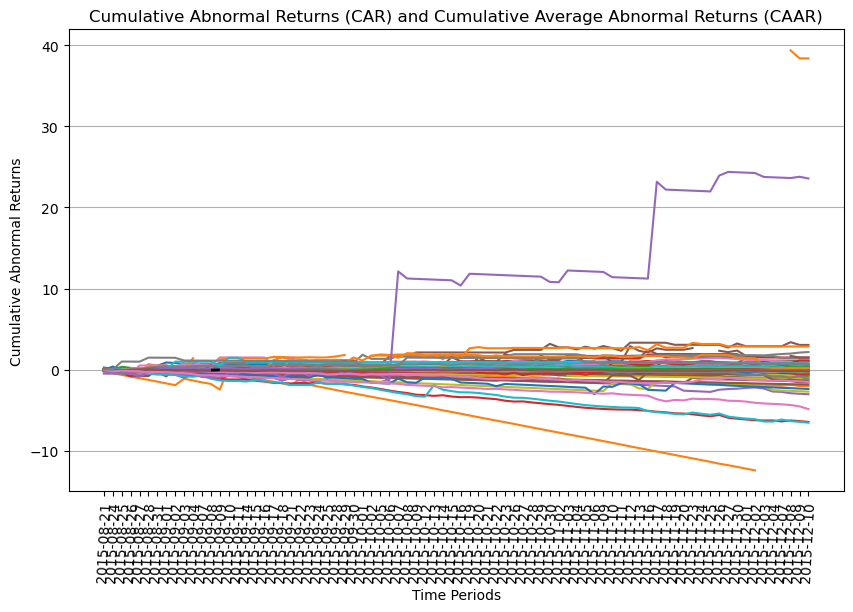

In [17]:
plt.figure(figsize=(10, 6))

# Plot each asset's CAR
for asset in cumulative_abnormal_returns.index:
    plt.plot(cumulative_abnormal_returns.columns, cumulative_abnormal_returns.loc[asset], label=f'CAR - {asset}')

# Plot CAAR (cumulative average abnormal returns) for all assets
plt.plot(cumulative_abnormal_returns.columns, cumulative_average_abnormal_returns, label='CAAR', color='black', linestyle='--', linewidth=2)

# Add labels and title
plt.title('Cumulative Abnormal Returns (CAR) and Cumulative Average Abnormal Returns (CAAR)')
plt.xlabel('Time Periods')
plt.ylabel('Cumulative Abnormal Returns')
plt.xticks(rotation=87)
plt.grid(axis='y')
plt.show()